In [1]:
### Importing Necessary Libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Uploading Data

df = pd.read_csv("DDoSdata.csv")

In [3]:
### Checking Data

df.head()

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1650261,1650261,1.528103e+09,e,1,tcp,1,192.168.100.150,54110,192.168.100.3,...,1.21662,40,38,1.56093,1.21662,328,308,1,DDoS,HTTP
1,1650262,1650262,1.528103e+09,e,1,tcp,1,192.168.100.150,54112,192.168.100.3,...,1.21662,40,38,1.56107,1.21662,328,308,1,DDoS,HTTP
2,1650263,1650263,1.528103e+09,e,1,tcp,1,192.168.100.150,54114,192.168.100.3,...,1.21662,40,38,1.24980,1.21662,328,308,1,DDoS,HTTP
3,1650264,1650264,1.528103e+09,e,1,tcp,1,192.168.100.150,54116,192.168.100.3,...,1.21662,40,38,1.24986,1.21662,328,308,1,DDoS,HTTP
4,1650265,1650265,1.528103e+09,e,1,tcp,1,192.168.100.150,54118,192.168.100.3,...,1.21662,40,38,1.24991,1.21662,328,308,1,DDoS,HTTP


In [4]:
### Checking Data Shape

df.shape

(1927101, 47)

In [5]:
### Dropping unnecessary column from data which is of no use like serial number 

df.drop(["Unnamed: 0","pkSeqID"],axis=1,inplace = True)

## Data is Too large its taking long time to computation so taking random 1000 samles randomly

In [6]:
df = df.sample(n=1000, random_state=42)

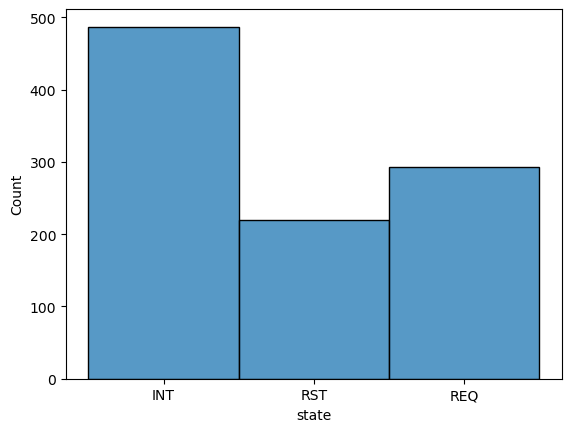

In [7]:
### Checking graphical representation of state columnn to understand the connection between attackers and the target 

sns.histplot(df.state)
plt.show()

### Understanding the dependent variables from the dataset ---> As state columns has a feature where Attackers send a request to user for BotNet Attack

### So taking state column as a  dependent variables 

In [8]:
### Spliting the data before applying variance to avoid information leak 

Y = df[["state"]] ### dependent variable `
df = df.drop(Y, axis=1 )

In [9]:
### Seprating dataset into 2 group or creating a subset of a dataset for further processing 

obj_dtypes =[]

for col in df.columns:
    if df[col].dtypes == "object":
        obj_dtypes.append(col)
        
obj_dtypes = df[obj_dtypes]

In [10]:
obj_dtypes.head()

,flgs,proto,saddr,sport,daddr,dport,category,subcategory
1909778,e,udp,192.168.100.150,22495,192.168.100.3,80,DDoS,UDP
1070350,e,udp,192.168.100.150,9236,192.168.100.3,80,DDoS,UDP
684543,e s,tcp,192.168.100.147,10420,192.168.100.3,80,DDoS,TCP
1310879,e,udp,192.168.100.148,60073,192.168.100.3,80,DDoS,UDP
1353333,e,udp,192.168.100.147,8152,192.168.100.3,80,DDoS,UDP


In [11]:
### Using label encoder to encode the varidable from catagorical form to numerical form

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [12]:
le = LabelEncoder()
print(le)
scaler = MinMaxScaler()
print(scaler)

LabelEncoder()
MinMaxScaler()


In [13]:
### Converting all dtypes into float before applying label encoder to the subset data 

obj_dtypes = obj_dtypes.apply(pd.to_numeric, errors='coerce').astype(float)

In [14]:
obj_dtypes.dtypes

flgs           float64
proto          float64
saddr          float64
sport          float64
daddr          float64
dport          float64
category       float64
subcategory    float64
dtype: object

In [15]:
### Applying label encoder on subset dataset

for col in obj_dtypes:
    le = LabelEncoder()
    obj_dtypes[col] = le.fit_transform(obj_dtypes[col])

obj_dtypes.head()

,flgs,proto,saddr,sport,daddr,dport,category,subcategory
1909778,0,0,0,341,0,0,0,0
1070350,0,0,0,135,0,0,0,0
684543,0,0,0,158,0,0,0,0
1310879,0,0,0,902,0,0,0,0
1353333,0,0,0,117,0,0,0,0


In [16]:
### Checking subset data shape 

obj_dtypes.shape

(1000, 8)

In [17]:
### Dropping obj_dtypes column form my orginal data to avoid data suplication 

df = df.drop(['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'category', 'subcategory'],axis=1 )

In [18]:
### Concating my subset data with my orgibal data 

df = pd.concat([df, obj_dtypes], axis=1)

In [19]:
### Checking data shape afyer applying label encoder on object dtypes column 

df.shape

(1000, 44)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1909778 to 1748241
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   stime                             1000 non-null   float64
 1   flgs_number                       1000 non-null   int64  
 2   proto_number                      1000 non-null   int64  
 3   pkts                              1000 non-null   int64  
 4   bytes                             1000 non-null   int64  
 5   state_number                      1000 non-null   int64  
 6   ltime                             1000 non-null   float64
 7   seq                               1000 non-null   int64  
 8   dur                               1000 non-null   float64
 9   mean                              1000 non-null   float64
 10  stddev                            1000 non-null   float64
 11  sum                               1000 non-null   float64
 1

In [21]:
### Converting all dtypes into float for further steps 

df = df.apply(pd.to_numeric, errors='coerce').astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1909778 to 1748241
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   stime                             1000 non-null   float64
 1   flgs_number                       1000 non-null   float64
 2   proto_number                      1000 non-null   float64
 3   pkts                              1000 non-null   float64
 4   bytes                             1000 non-null   float64
 5   state_number                      1000 non-null   float64
 6   ltime                             1000 non-null   float64
 7   seq                               1000 non-null   float64
 8   dur                               1000 non-null   float64
 9   mean                              1000 non-null   float64
 10  stddev                            1000 non-null   float64
 11  sum                               1000 non-null   float64
 1

In [23]:
### Applying variance on the dataset to the reduce the data with important feature only 

from sklearn.feature_selection import VarianceThreshold

In [24]:
### Creating selector class and adding variance threshold as 0.5 means 50% variety of data should be removed 

selector = VarianceThreshold(threshold=0.5)
selector

VarianceThreshold(threshold=0.5)

In [25]:
selector.fit_transform(df)

array([[1.52809937e+09, 3.00000000e+00, 8.00000000e+00, ...,
        9.59000000e+02, 3.76000000e+02, 3.41000000e+02],
       [1.52809932e+09, 3.00000000e+00, 7.00000000e+00, ...,
        7.00000000e+02, 7.00000000e+02, 1.35000000e+02],
       [1.52809577e+09, 1.00000000e+00, 7.00000000e+00, ...,
        5.18000000e+02, 1.68000000e+02, 1.58000000e+02],
       ...,
       [1.52809937e+09, 3.00000000e+00, 8.00000000e+00, ...,
        1.13600000e+03, 4.16000000e+02, 5.00000000e+00],
       [1.52809577e+09, 1.00000000e+00, 4.00000000e+00, ...,
        3.50000000e+02, 1.20000000e+02, 7.66000000e+02],
       [1.52809935e+09, 3.00000000e+00, 7.00000000e+00, ...,
        7.00000000e+02, 5.32000000e+02, 4.05000000e+02]])

In [26]:
### Checking all the columns which met the threshold of 0.5 oe 50%

selector.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False])

In [27]:
### assigning all the selected column in columns 

columns = selector.get_support(indices = True)

In [28]:
### Storing selected columns in a new df --> Which contains all the rows and all selected columns after applying variance 

df_selected = df.iloc[:, columns]

In [29]:
### Checking the shape of data after variance

df_selected.shape

(1000, 32)

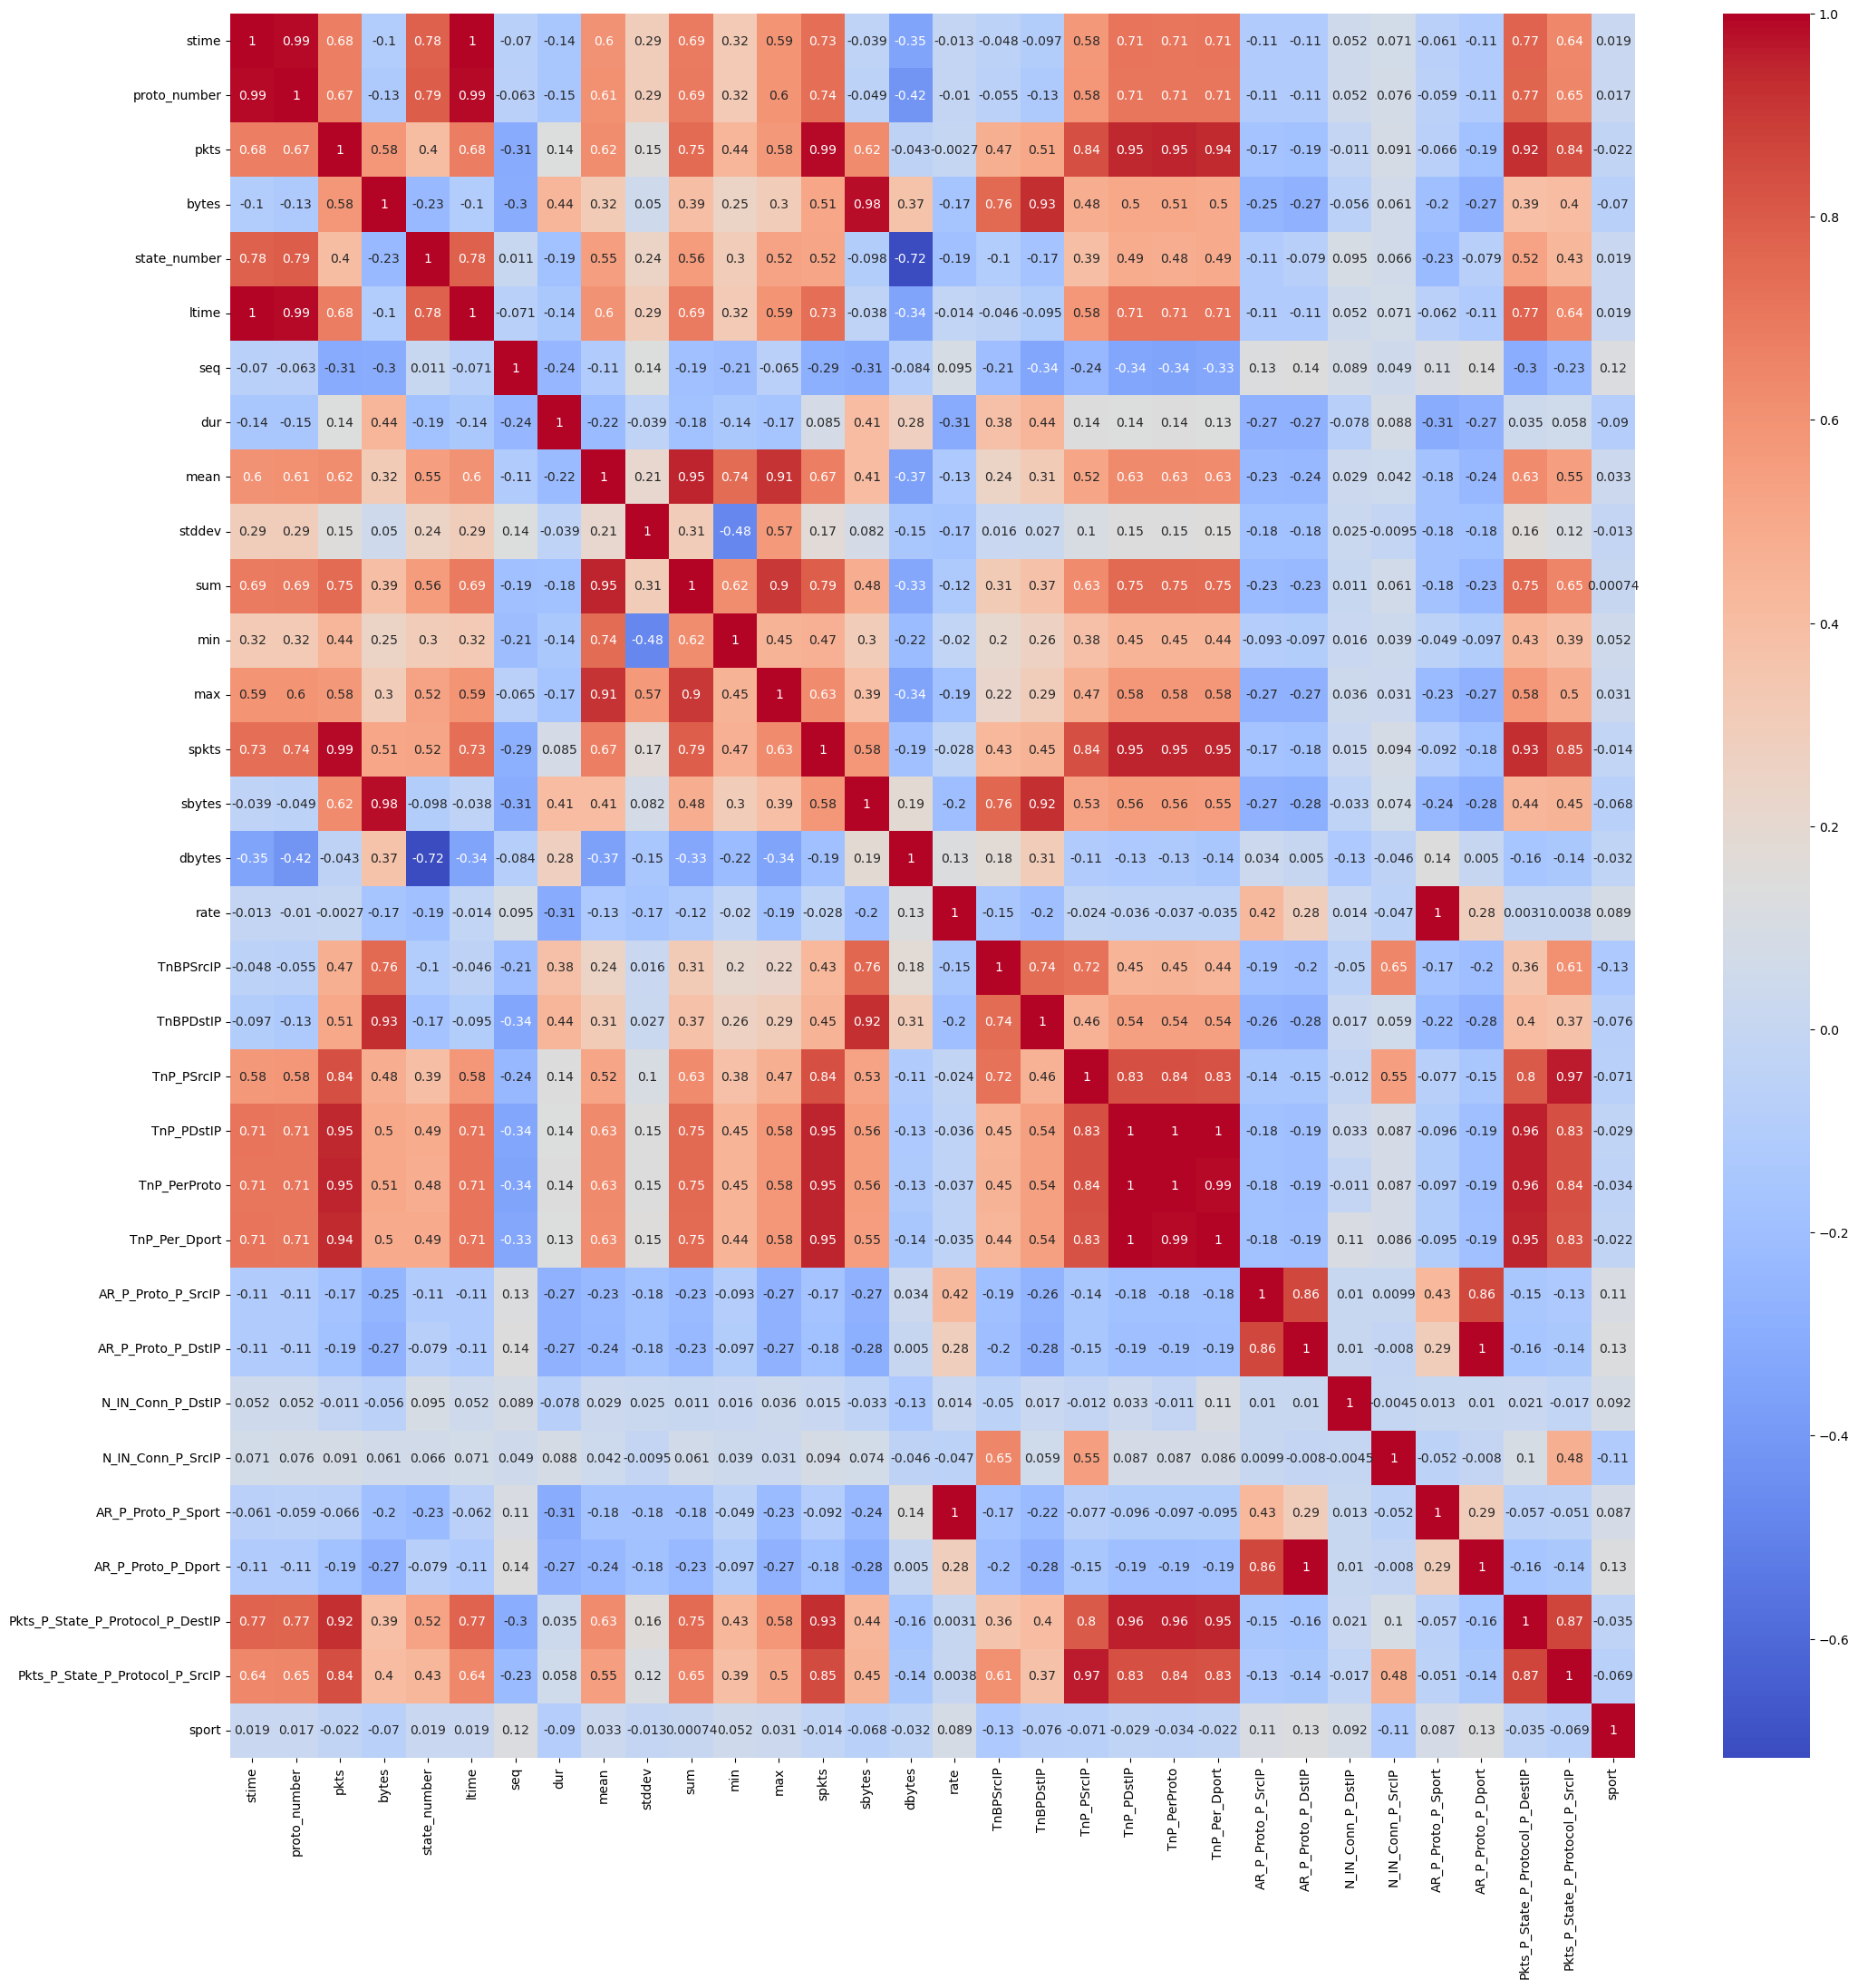

In [30]:
### Checking correlation with seaborn heatmap 

plt.figure(figsize =(25,25))
sns.heatmap(df_selected.corr(), annot = True, cmap= "coolwarm")
plt.show()

In [31]:
### Using a for loop and storing all the columns which is correlated with each other more than 0.7 

correlation = df_selected.corr().abs()

new_df= [] 

cols_to_remove = []

for col in correlation:
    if col not in cols_to_remove:
        highly_correlated_cols = correlation[col][correlation[col] > 0.7].index.tolist()
        if highly_correlated_cols:
            cols_to_remove.extend(highly_correlated_cols[1:])
            new_df.append(highly_correlated_cols[0])
        else:
            new_df.append(col)
            
print(new_df)

['stime', 'pkts', 'bytes', 'seq', 'dur', 'mean', 'stddev', 'state_number', 'rate', 'AR_P_Proto_P_SrcIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'sport']


In [32]:
new_df = df_selected[new_df]

In [33]:
new_df.head()

,stime,pkts,bytes,seq,dur,mean,stddev,state_number,rate,AR_P_Proto_P_SrcIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,sport
1909778,1.528099e+09,8.0,480.0,144958.0,14.882650,3.608078,0.642544,4.0,0.470346,0.537539,100.0,47.0,341.0
1070350,1.528099e+09,7.0,420.0,91994.0,14.963793,3.643915,1.200118,4.0,0.400968,0.467796,100.0,100.0,135.0
684543,1.528096e+09,7.0,890.0,159264.0,12.373059,2.064213,1.464861,1.0,0.484925,0.565672,100.0,24.0,158.0
1310879,1.528099e+09,11.0,660.0,70362.0,13.718507,3.658348,0.629627,4.0,0.728942,0.801816,100.0,100.0,902.0
1353333,1.528099e+09,15.0,900.0,112816.0,13.657274,3.910158,1.367949,4.0,1.025095,1.098320,100.0,65.0,117.0


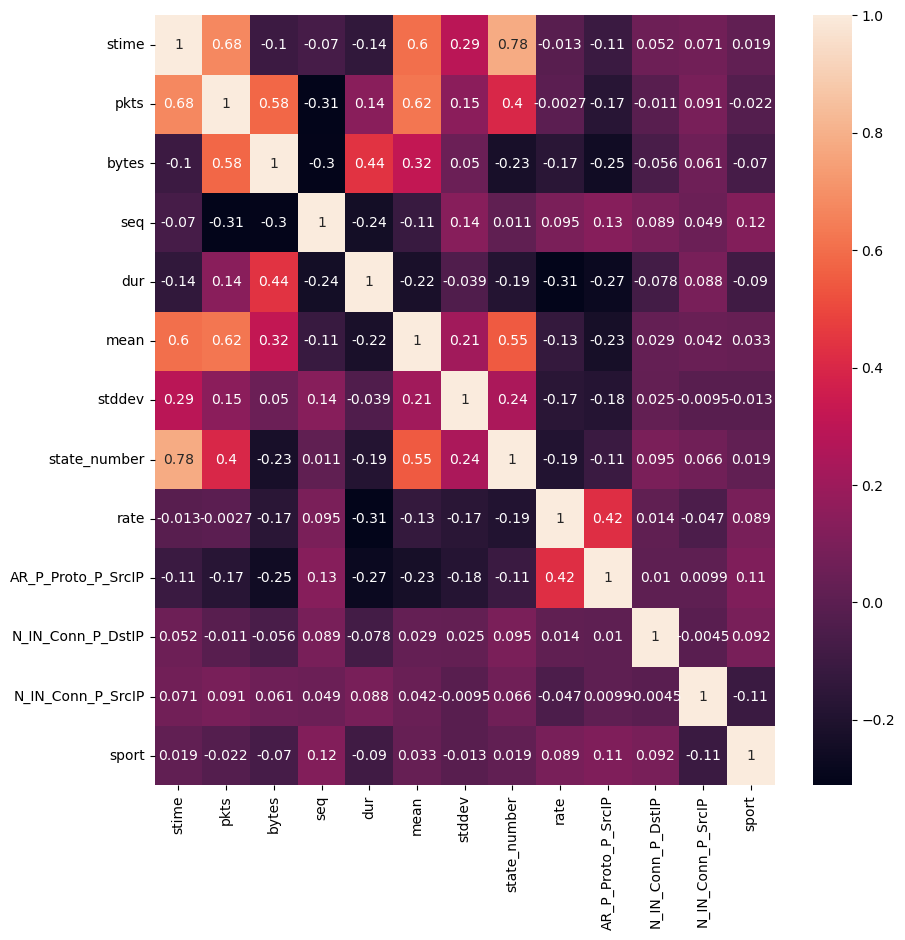

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(new_df.corr(), annot = True)
plt.show()

In [35]:
### Scaling the data using standard scaler 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [36]:
scaler.fit(new_df)

StandardScaler()

In [37]:
scaled_data = scaler.transform(new_df)
scaled_data

array([[ 1.03136964,  0.2121196 , -0.59833804, ...,  0.05479808,
        -1.37373601, -0.52905944],
       [ 1.00603341, -0.0633604 , -0.86753834, ...,  0.05479808,
         0.76058253, -1.25025907],
       [-0.96737248, -0.0633604 ,  1.24119733, ...,  0.05479808,
        -2.29994972, -1.16973678],
       ...,
       [ 1.0311159 ,  0.2121196 , -0.59833804, ...,  0.05479808,
        -1.1723852 , -1.70538504],
       [-0.96698959, -0.88980041,  0.0118493 , ...,  0.05479808,
        -2.05832875,  0.95885241],
       [ 1.02353034, -0.0633604 , -0.86753834, ...,  0.05479808,
        -0.20590133, -0.30499742]])

In [38]:
### Using PCA for dimensionality reduction 

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca

PCA(n_components=3)

In [39]:
X = pca.fit_transform(scaled_data)

In [40]:
X

array([[-0.99842632,  0.80715388, -0.19405725],
       [-1.24082775,  0.55399569, -0.57430418],
       [ 1.09660942, -1.26918124, -0.07655691],
       ...,
       [-1.23191406,  0.27299773, -0.09872021],
       [ 1.04141407,  0.53887725, -0.27561208],
       [-0.73601248,  1.62954096, -1.46492806]])

In [41]:
le

LabelEncoder()

In [42]:
Y = le.fit_transform(Y)

In [43]:
### Checking my independent & dependent variables 

print(X)
print( "========+++++++++++===========" )
print(Y)

[[-0.99842632  0.80715388 -0.19405725]
 [-1.24082775  0.55399569 -0.57430418]
 [ 1.09660942 -1.26918124 -0.07655691]
 ...
 [-1.23191406  0.27299773 -0.09872021]
 [ 1.04141407  0.53887725 -0.27561208]
 [-0.73601248  1.62954096 -1.46492806]]
========+++++++++++===========
[0 0 2 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 2 1 0 0 1
 0 2 1 1 0 2 0 2 2 0 0 2 1 1 2 1 1 0 0 1 0 0 2 0 0 1 2 2 2 0 2 0 2 0 2 1 1
 2 0 0 1 0 1 1 2 0 1 0 1 0 1 1 0 0 0 0 2 0 0 0 0 1 0 0 2 0 1 0 1 0 1 2 1 1
 0 0 0 0 0 0 0 0 2 1 1 1 0 2 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 1 1 0 2 2 1 1 0 0 1 0 0 1 1 2 1 2 1 0 1 0 2 0 0 0 2 2 1 1 0 1 1 0 1
 1 1 0 0 2 0 1 0 0 1 0 0 1 0 0 1 1 0 2 0 1 1 1 2 0 0 1 1 0 2 2 0 0 2 1 1 0
 0 0 0 2 0 0 1 0 0 1 2 0 0 2 0 1 0 1 0 2 0 0 0 2 1 0 1 1 1 0 0 1 1 0 1 2 1
 0 0 0 0 1 0 0 0 0 0 0 0 2 1 1 0 0 0 0 0 1 1 0 1 1 2 1 2 0 0 0 0 2 1 2 1 2
 2 0 2 0 0 1 0 1 1 0 0 1 0 0 2 0 2 1 0 0 0 0 1 0 2 0 0 0 1 2 2 0 0 0 0 0 0
 1 2 0 1 0 0 1 0 0 1 1 0 2 0 2 1 1 0 2 0 2 1 1 1 0 0 2

In [44]:
### From sklearn applying train test split my independent and dependent variables

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [45]:
# Checking the shape of the training and test sets

print('Shape of the training input data:', X_train.shape)
print('Shape of the training output data:', Y_train.shape)
print('Shape of the test input data:', X_test.shape)
print('Shape of the test output data:', Y_test.shape)

Shape of the training input data: (670, 3)
Shape of the training output data: (670,)
Shape of the test input data: (330, 3)
Shape of the test output data: (330,)


In [46]:
### Target variable is showing multiple output array so converting it into 1D aray for further ml process

print(Y.ndim)

Y.shape

1


(1000,)

In [47]:
### Importing all the necessary ML libraries for model prediction 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [48]:
### Defining the model 

logistic = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [49]:
logistic_param = {"penalty": ["l1","l2"], "C": [1,2,10], "max_iter" : [100,200], "solver": ["saga","liblinear"]
             ,"multi_class":["auto", "ovr", "multinomial"],"verbose": [0,1]},
decision_tree_param ={"criterion":["gini","entropy"], "max_depth":[None]+[2,10,15] ,"min_samples_split":[2,10,15,20] , "min_samples_leaf":[3,6,9,12],
                                "max_features" :["auto","sqrt", "log2"]},
random_forest__param ={"n_estimators":[20,50,100] , "criterion":["gini","entropy","log_loss"],"max_depth":[None]+[10,20,30], "min_samples_split":np.arange(2,10),
                              "min_samples_leaf":np.arange(2,10), "max_features" :["auto","sqrt", "log2"]}

In [50]:
### Creating dictonary for model to fit in 

models = {"random_forest": random_forest ,
          "logistic" :logistic,
          "decision_tree":decision_tree}

In [51]:
clf1 = RandomizedSearchCV(logistic, logistic_param,cv=5,n_iter=10,random_state=5)
clf2 = RandomizedSearchCV(decision_tree, decision_tree_param,cv=10,n_iter=15,random_state=33)
clf3 = RandomizedSearchCV(random_forest, random_forest__param,cv=15,n_iter=20,random_state=42)

In [53]:
search1 = clf1.fit(X_train,Y_train)
search2 = clf2.fit(X_train,Y_train)
search3 = clf3.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

max_iter reached after 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 43 epochs took 0 seconds
max_iter reached after 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 51 epochs took 0 seconds
max_iter reached after 0 seconds
convergence after 27 epochs took 0 seconds
convergence after 48 epochs took 0 seconds
max_iter reached after 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 29 epochs took 0 seconds
max_iter reached after 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 44 epochs took 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
convergence after 171 epochs took 0 seconds
convergence after 140 epochs took 0 seconds
convergence after 150 epochs took 0 seconds
convergence after 134 epochs took 0 seconds
convergence after 191 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


convergence after 151 epochs took 0 seconds
convergence after 141 epochs took 0 seconds
convergence after 171 epochs took 0 seconds
convergence after 129 epochs took 0 seconds
convergence after 189 epochs took 0 seconds


In [54]:
### Checking the best score and best parameter 

print(f"Best parameter as per logistic regression model is {search1.best_params_} & best score is {search1.best_score_}")
print(f"Best parameter as per decision tree model is {search2.best_params_} & best score is {search2.best_score_}")
print(f"Best parameter as per random forest model is {search3.best_params_} & best score is {search3.best_score_}")

Best parameter as per logistic regression model is {'verbose': 0, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 200, 'C': 10} & best score is 0.9104477611940298
Best parameter as per decision tree model is {'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'} & best score is 0.9313432835820894
Best parameter as per random forest model is {'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'log_loss'} & best score is 0.9612457912457911


## Random Forest Model with {n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'} this parameter have the higest Accuracy Score which is 96% 